In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline , Pipeline
from sklearn.compose import ColumnTransformer


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

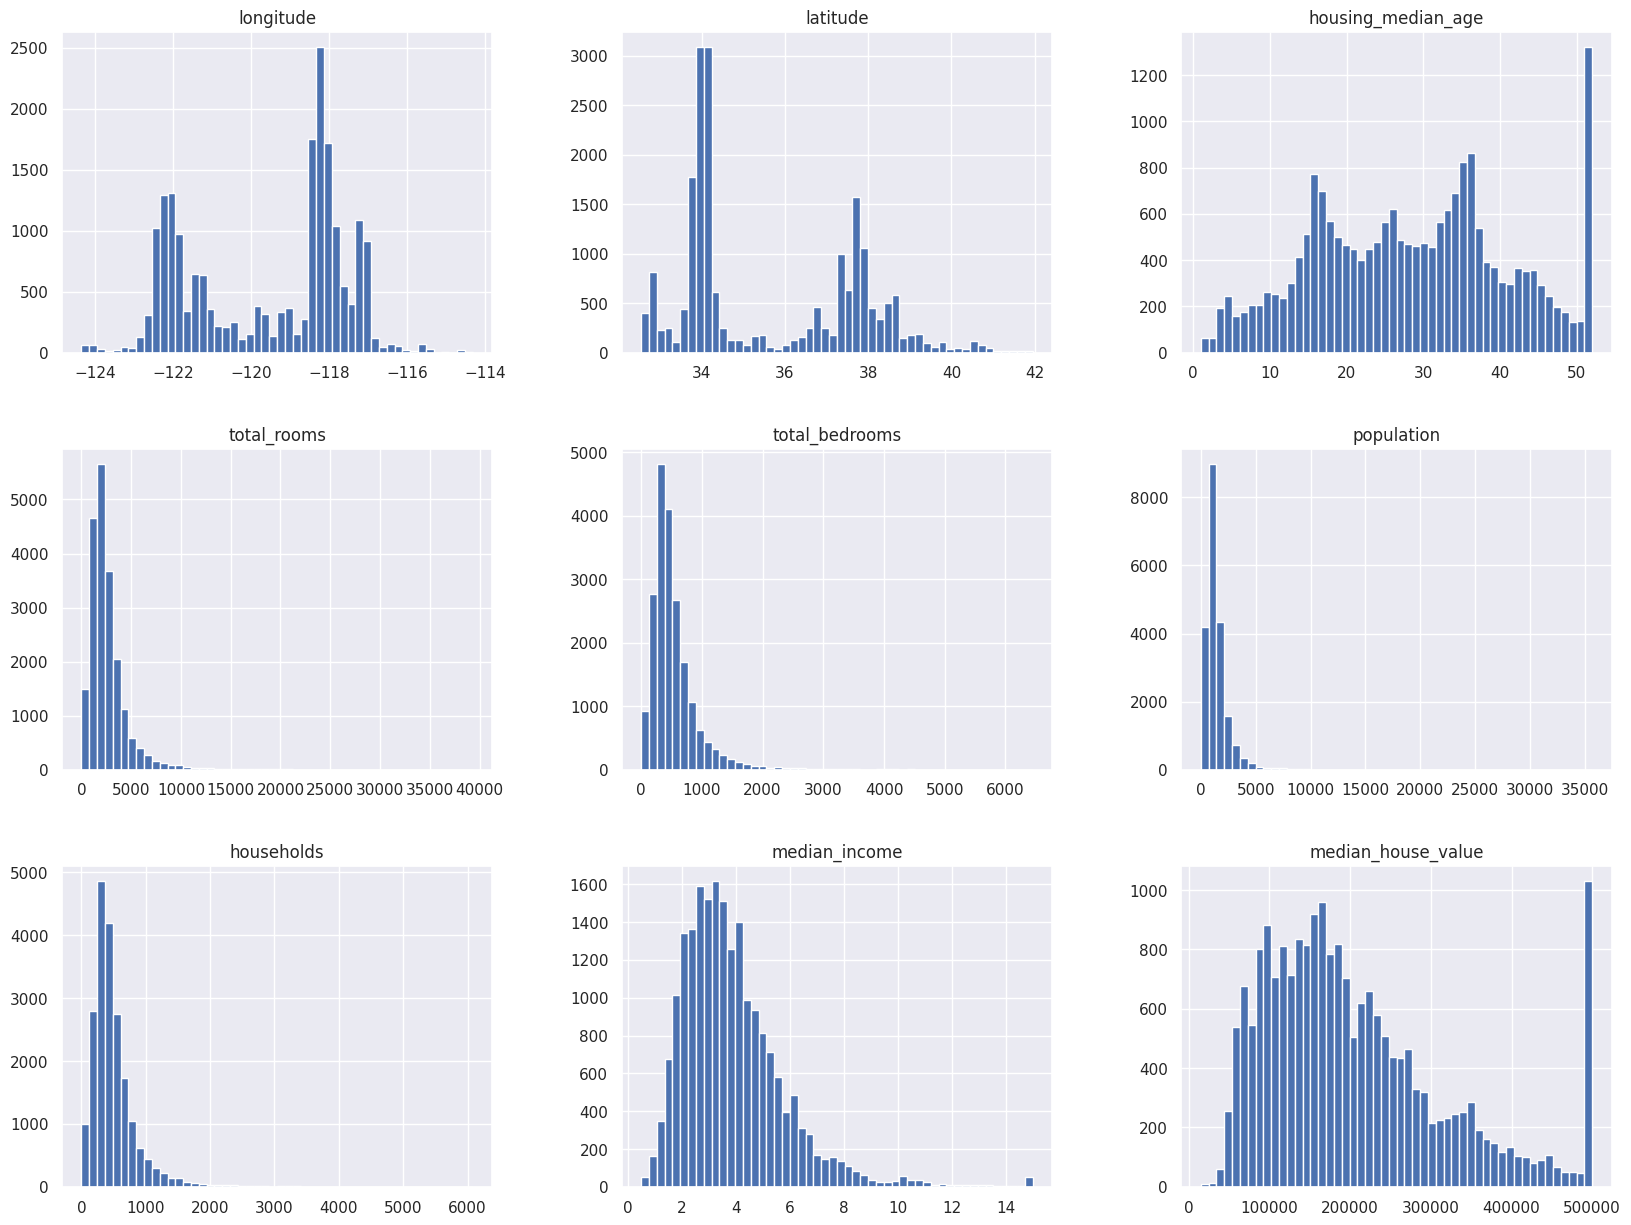

In [7]:
df.hist(bins=50, figsize=(20,15))

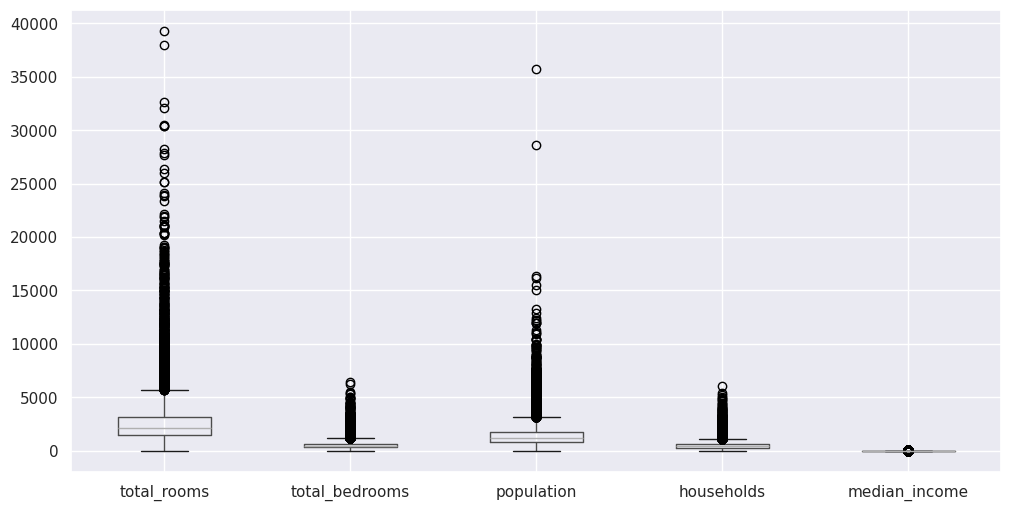

In [8]:
df[['total_rooms','total_bedrooms','population','households','median_income']].boxplot(figsize=(12,6))
plt.show()

In [9]:
def remove_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['float64','int64']).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

df = remove_outliers_iqr(df)

'''
def clip_outliers_iqr(df, target_col='median_house_value'):
    df = df.copy()
    numeric_cols = df.select_dtypes(include=['float64','int64']).columns

    # don’t touch the target
    if target_col in numeric_cols:
        numeric_cols = numeric_cols.drop(target_col)

    for col in numeric_cols:
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
        df[col] = df[col].clip(lower, upper)

    return df
df = clip_outliers_iqr(df)
'''

"\ndef clip_outliers_iqr(df, target_col='median_house_value'):\n    df = df.copy()\n    numeric_cols = df.select_dtypes(include=['float64','int64']).columns\n\n    # don’t touch the target\n    if target_col in numeric_cols:\n        numeric_cols = numeric_cols.drop(target_col)\n\n    for col in numeric_cols:\n        Q1, Q3 = df[col].quantile([0.25, 0.75])\n        IQR = Q3 - Q1\n        lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR\n        df[col] = df[col].clip(lower, upper)\n\n    return df\ndf = clip_outliers_iqr(df)\n"

In [10]:
df.shape

(16725, 10)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

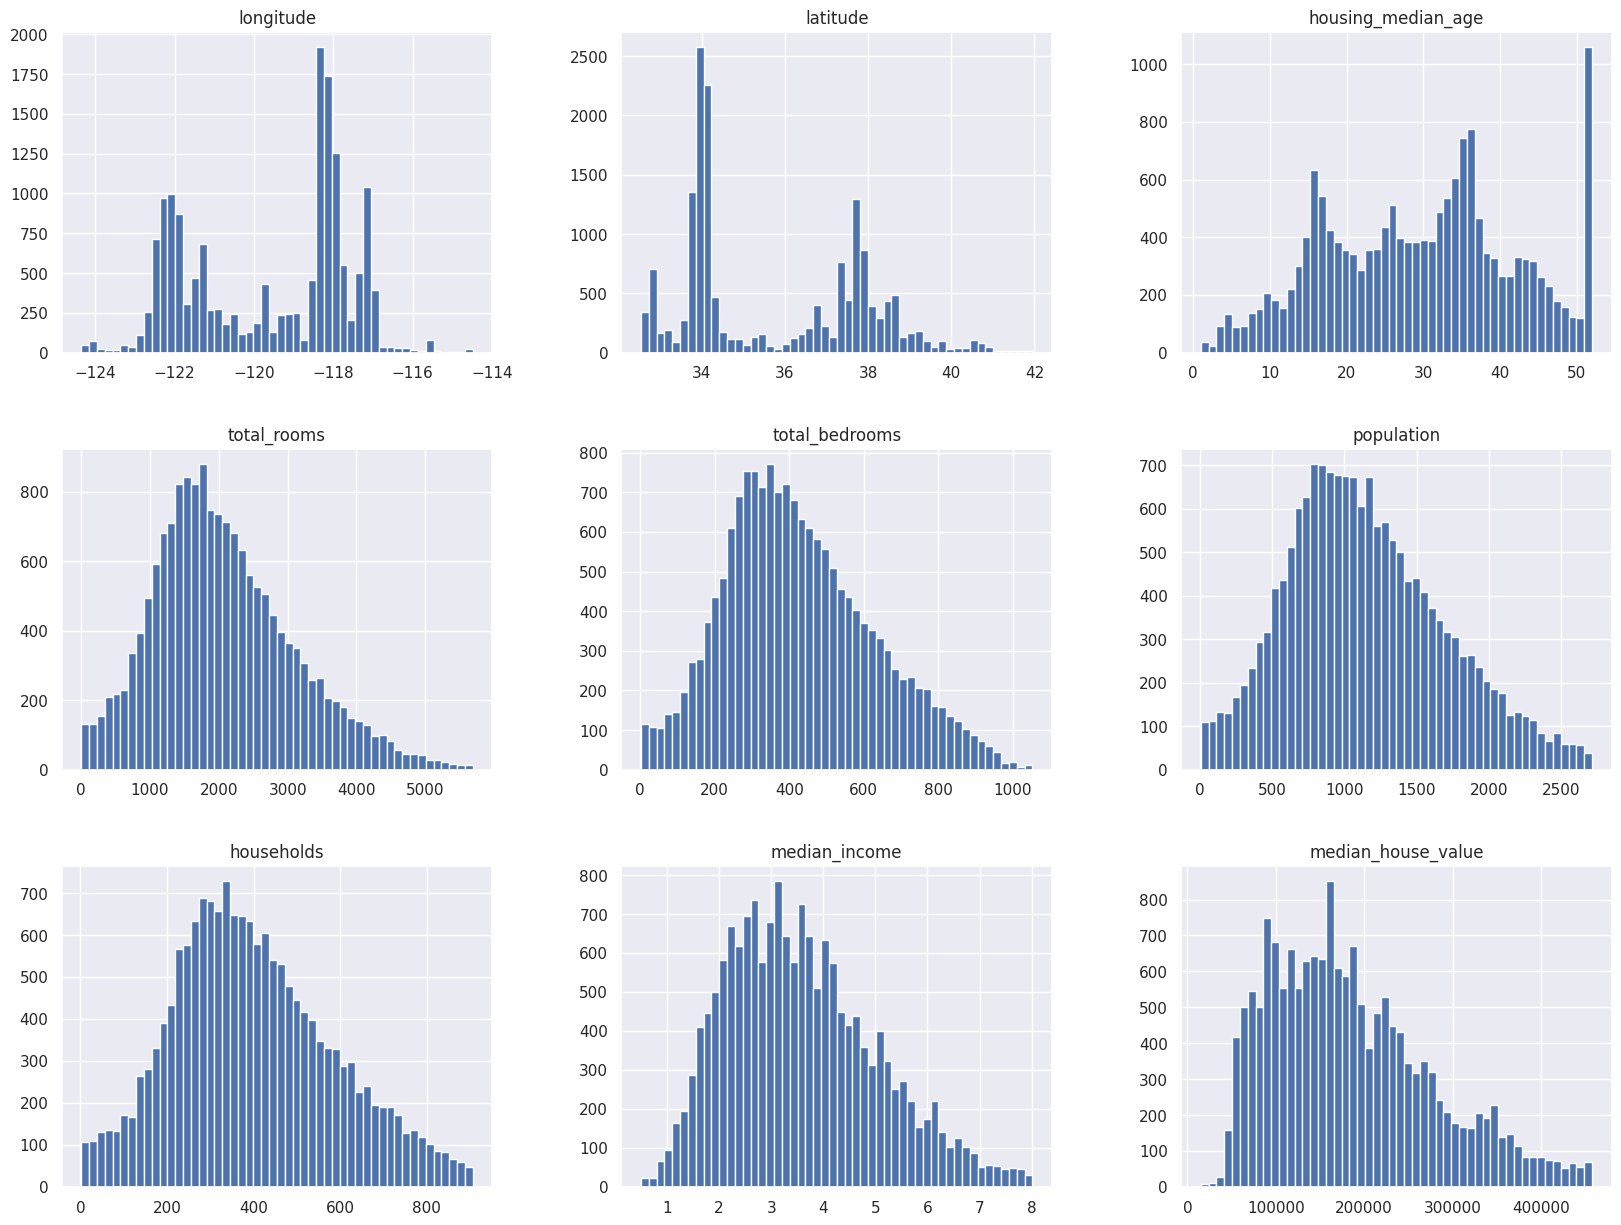

In [11]:
df.hist(bins=50, figsize=(20,15))

In [12]:

px.scatter_geo(df, lon="longitude", lat="latitude", color="median_house_value",scope="usa", title="Housing Prices")

The price depends on the distance from the ocean

In [13]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

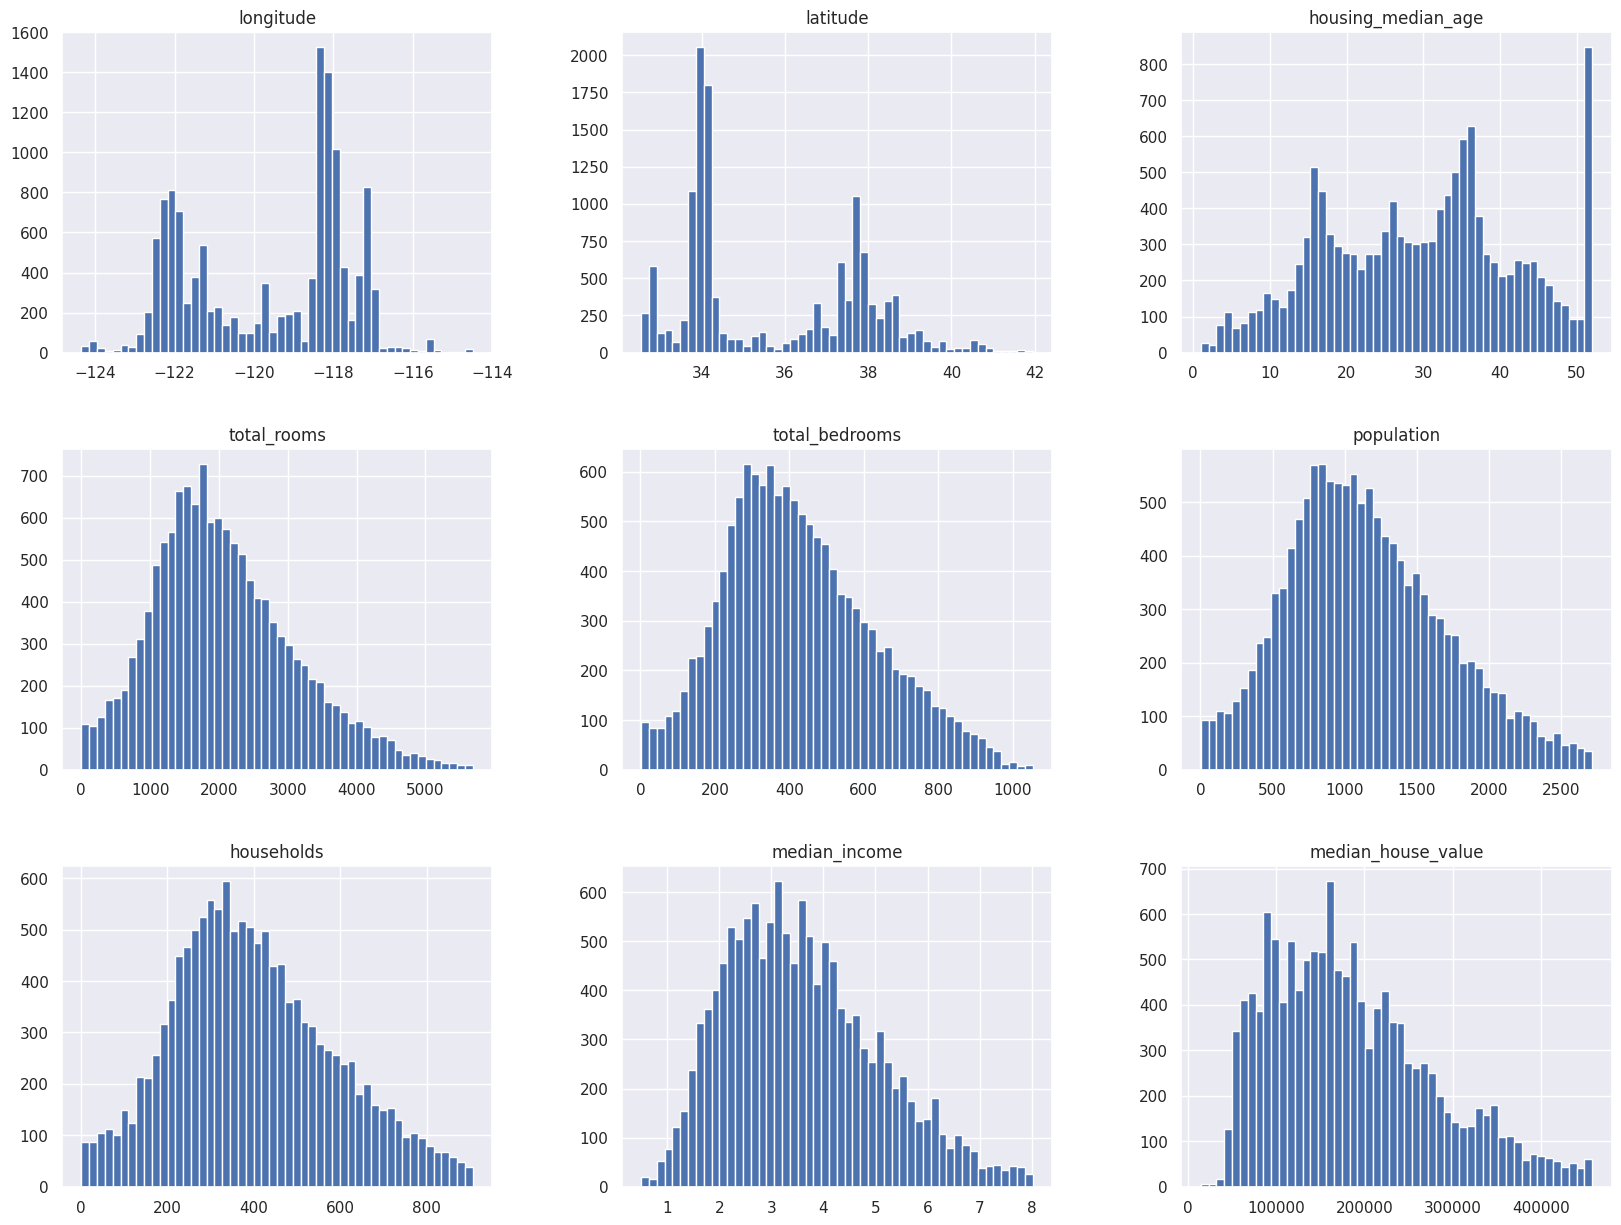

In [14]:
train_set.hist(bins=50, figsize=(20,15))

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

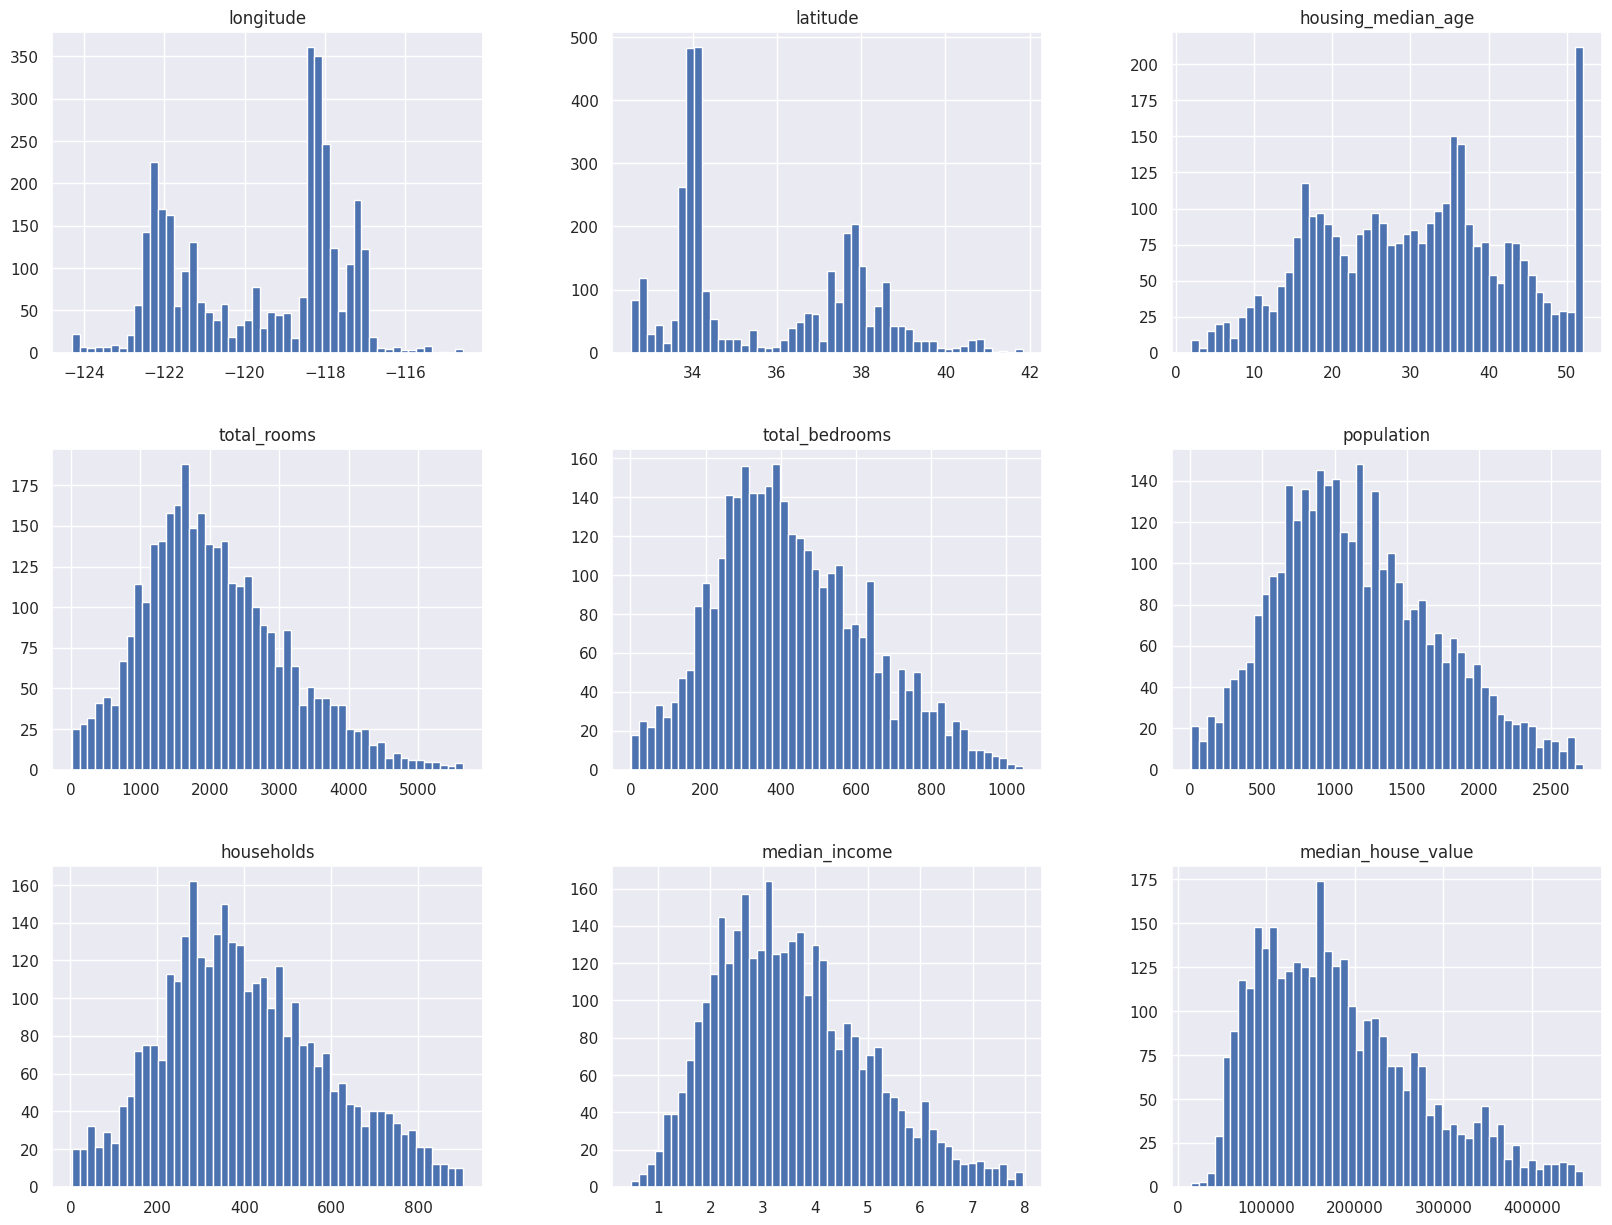

In [15]:
test_set.hist(bins=50, figsize=(20,15))

In [16]:
train_set.corr(numeric_only=True)["median_house_value"].apply(lambda x: abs(x)).sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.636024
total_rooms,0.196940
latitude,0.165353
households,0.118420
total_bedrooms,0.087429
housing_median_age,0.085276
longitude,0.036348
population,0.009778


In [17]:
# Rooms per household
train_set["rooms_per_household"] = train_set["total_rooms"]/train_set["households"]

# Bedrooms per room
train_set["bedrooms_per_room"] = train_set["total_bedrooms"]/train_set["total_rooms"]

# Population per household
train_set["population_per_household"] = train_set["population"]/train_set["households"]

# Population per room
train_set["population_per_room"] = train_set["population"] / train_set["total_rooms"]


In [18]:
train_set.corr(numeric_only=True)["median_house_value"].apply(lambda x: abs(x)).sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.636024
population_per_room,0.237960
bedrooms_per_room,0.207972
total_rooms,0.196940
population_per_household,0.190174
latitude,0.165353
households,0.118420
rooms_per_household,0.090732
total_bedrooms,0.087429


In [19]:
train_features = train_set.drop("median_house_value", axis=1)
train_labels = train_set["median_house_value"].copy()

In [20]:
train_num = train_features.drop("ocean_proximity", axis=1)
train_cat = train_features[["ocean_proximity"]]

In [21]:
imputer = SimpleImputer(strategy="median")

In [22]:
imputer.fit(train_num)
np.set_printoptions(suppress=True)
imputer.statistics_

array([-118.7       ,   34.4       ,   30.        , 1932.        ,
        401.        , 1086.        ,  379.        ,    3.4023    ,
          5.18194955,    0.20444344,    2.83970226,    0.52523548])

In [23]:
X1 = imputer.transform(train_num)

In [24]:
cat_encoder = OneHotEncoder(sparse_output=False)
train_cat_1hot = cat_encoder.fit_transform(train_cat)
train_cat_1hot

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [25]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [26]:
train_num.describe().loc[["min", "max"]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,population_per_room
min,-124.35,32.54,1.0,2.0,2.0,3.0,2.0,0.4999,0.846154,0.115385,0.692308,0.018109
max,-114.49,41.95,52.0,5688.0,1053.0,2717.0,906.0,8.0158,132.533333,1.000000,63.750000,8.736842


In [27]:
scaler = MinMaxScaler()
train_num_scaled = scaler.fit_transform(train_num)
train_num_scaled

array([[0.74036511, 0.01912859, 0.66666667, ..., 0.05966559, 0.0349429 ,
        0.05087867],
       [0.73123732, 0.04144527, 0.29411765, ..., 0.06593842, 0.04959898,
        0.07457693],
       [0.63995943, 0.16259299, 0.74509804, ..., 0.16889291, 0.05108453,
        0.11659619],
       ...,
       [0.64198783, 0.16365569, 0.54901961, ..., 0.1446473 , 0.04638803,
        0.10040001],
       [0.2535497 , 0.54410202, 0.25490196, ..., 0.0566367 , 0.03286511,
        0.04755403],
       [0.34482759, 0.53666312, 0.54901961, ..., 0.15691951, 0.03269353,
        0.06852023]])

In [28]:
train_num_scaled.min(axis=0), train_num_scaled.max(axis=0)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

# Pipelining

In [32]:
num_pipeline = Pipeline([ ('imputer', SimpleImputer(strategy = 'median')),
                          ('scaler', StandardScaler())
                          ])
Xtrain_num = num_pipeline.fit_transform(train_num)

In [34]:
num_attributes = list(train_num)
cat_attributes = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attributes),
        ("cat", OneHotEncoder(sparse_output=False), cat_attributes),
    ])

In [37]:
XTrainFeatures = full_pipeline.fit_transform(train_features)

# Linear Regression Model vs Decision Tree Model

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [47]:
lr = LinearRegression()
lr.fit(XTrainFeatures, train_labels)
lr_predicition = lr.predict(XTrainFeatures)

In [48]:
dt = DecisionTreeRegressor()
dt.fit(XTrainFeatures, train_labels)
dt_prediction = dt.predict(XTrainFeatures)

# Accuracy

In [50]:
from sklearn.metrics import r2_score
print("Linear Regression Score :",r2_score(train_labels, lr_predicition))
print("Decision Tree Regression Score :",r2_score(train_labels, dt_prediction))

Linear Regression Score : 0.6337118157527779
Decision Tree Regression Score : 1.0


* Linear Regression model is underfitting the data.
* Decision Tree model is overfitting the data.

In [51]:
from sklearn.model_selection import cross_val_score
lrscore = cross_val_score(lr, XTrainFeatures, train_labels, scoring="r2", cv=10)
dtscore = cross_val_score(dt, XTrainFeatures, train_labels, scoring="r2", cv=10)

In [54]:
print("Linear Regression Score :",round(lrscore.mean(),2))
print("Linear Regression Standard Deviation ",round(lrscore.std(),2))
print("Decision Tree Regression Score :",round(dtscore.mean(),2))
print("Decision Tree Regression Standard Deviation ",round(dtscore.std(),2))

Linear Regression Score : 0.63
Linear Regression Standard Deviation  0.02
Decision Tree Regression Score : 0.57
Decision Tree Regression Standard Deviation  0.02


# Fine Tuning

In [56]:
from sklearn.model_selection import GridSearchCV
parm_grid = {'max_depth':[2,3,4,5],'max_features': [2,4,6,8]}
grid_search = GridSearchCV(dt, parm_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(XTrainFeatures, train_labels)
grid_search.best_params_

{'max_depth': 5, 'max_features': 8}

In [58]:
dt_tune = DecisionTreeRegressor(max_depth=5, max_features=8)
dt_tune.fit(XTrainFeatures, train_labels)
dt_tune_predictions= dt_tune.predict(XTrainFeatures)

In [59]:
print("Linear Regression Score :",r2_score(train_labels, dt_tune_predictions))


Linear Regression Score : 0.6135870289600366


In [62]:
# Testing Accuracy
test_features = test_set.drop("median_house_value", axis=1)
test_features['rooms_per_household'] = test_features['total_rooms']/test_features['households']
test_features['bedrooms_per_room'] = test_features['total_bedrooms']/test_features['total_rooms']
test_features['population_per_household'] = test_features['population']/test_features['households']
test_features["population_per_room"] = test_features["population"] / test_features["total_rooms"]

test_labels = test_set["median_house_value"].copy()

test_features_prepared = full_pipeline.transform(test_features)

lin_reg_predictions_test = lr.predict(test_features_prepared)
tree5_predictions_test = dt_tune.predict(test_features_prepared)

print("Linear Regression Accuracy on Test Data: ", r2_score(test_labels, lin_reg_predictions_test))
print("Decision Tree Accuracy on Test Data: ", r2_score(test_labels, tree5_predictions_test))

Linear Regression Accuracy on Test Data:  0.6334389741038668
Decision Tree Accuracy on Test Data:  0.5990361437342231


In [64]:
# Linear Regression vs. Decision Tree Training and Testing Accuracy
pd.DataFrame({ "Linear Regression": [r2_score(train_labels, lr_predicition), r2_score(test_labels, lin_reg_predictions_test)],
                "Decision Tree": [r2_score(train_labels, dt_tune_predictions), r2_score(test_labels, tree5_predictions_test)]},
                index=["Training Accuracy", "Testing Accuracy"])

,Linear Regression,Decision Tree
Training Accuracy,0.633712,0.613587
Testing Accuracy,0.633439,0.599036


In [65]:
# save linear regression model
import joblib
joblib.dump(lr, "lin_reg.pkl")

['lin_reg.pkl']

In [66]:
# Load the model
lin_reg = joblib.load("lin_reg.pkl")

# Use the model to make predictions
lin_reg_predictions_test = lin_reg.predict(XTrainFeatures)


In [67]:
# Save Pipeline
import joblib
joblib.dump(full_pipeline, "full_pipeline.pkl")

['full_pipeline.pkl']

In [68]:
%%writefile app.py

import streamlit as st
import joblib
import numpy as np
import pandas as pd

# Load the model
lin_reg = joblib.load("lin_reg.pkl")

# Load the pipeline
full_pipeline = joblib.load("full_pipeline.pkl")

# Load the data
housing = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv")

# Create a title and sub-title
st.title("California Housing Price Prediction App")

st.write("""
This app predicts the **California Housing Price**!
""")

# Take the input from the user
longitude = st.slider('longitude', float(housing['longitude'].min()), float(housing['longitude'].max()))
latitude = st.slider('latitude', float(housing['latitude'].min()), float(housing['latitude'].max()))

housing_median_age = st.slider('housing_median_age', float(housing['housing_median_age'].min()), float(housing['housing_median_age'].max()))
total_rooms = st.slider('total_rooms', float(housing['total_rooms'].min()), float(housing['total_rooms'].max()))
total_bedrooms = st.slider('total_bedrooms', float(housing['total_bedrooms'].min()), float(housing['total_bedrooms'].max()))
population = st.slider('population', float(housing['population'].min()), float(housing['population'].max()))
households = st.slider('households', float(housing['households'].min()), float(housing['households'].max()))
median_income = st.slider('median_income', float(housing['median_income'].min()), float(housing['median_income'].max()))

ocean_proximity = st.selectbox('ocean_proximity', ('<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'))

# Store a dictionary into a variable
user_data = {'longitude': longitude,

'latitude': latitude,
'housing_median_age': housing_median_age,
'total_rooms': total_rooms,
'total_bedrooms': total_bedrooms,
'population': population,
'households': households,
'median_income': median_income,
'ocean_proximity': ocean_proximity}

# Transform the data into a data frame
features = pd.DataFrame(user_data, index=[0])

# Additional transformations
features['rooms_per_household'] = features['total_rooms']/features['households']
features['bedrooms_per_room'] = features['total_bedrooms']/features['total_rooms']
features['population_per_household'] = features['population']/features['households']

# Pipeline
features_prepared = full_pipeline.transform(features)

# Predict the output
prediction = lin_reg.predict(features_prepared)[0]

# Set a subheader and display the prediction
st.subheader('Prediction')
st.markdown('''# $ {} '''.format(round(prediction), 2))


Writing app.py


In [69]:
!streamlit run app.py

/bin/bash: line 1: streamlit: command not found
